# Regresión

Vamos a trabajar con el dataset de paltas (*avocados*). Su descripción la pueden encontrar en https://www.kaggle.com/neuromusic/avocado-prices.

### 1. Carga de datos

a. Abrir el dataset (avocado.csv). Parsear fechas con la columna "Date".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
palta = pd.read_csv('Datasets/avocado.csv', delimiter=',', parse_dates=['Date'])
palta.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
palta.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

b. Eliminar la columna "Unnamed: 0".

In [4]:
palta.drop(['Unnamed: 0'], axis = 1, inplace = True)
palta.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


c. Ordenar el dataframe de manera creciente por fecha.

In [5]:
palta.sort_values(by='Date', inplace = True)
palta.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton


d. Resetear los índices del Dataframe

In [6]:
palta.reset_index(inplace = True, drop  = True)
palta.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton


### 2. Análisis exploratorio de datos

a. ¿Cuáles variables son numéricas y cuáles categóricas?¿Hay NaNs?

In [7]:
palta.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

b. ¿Cuántas regiones hay?¿Cuántas entradas por región?

In [8]:
palta.groupby(['region']).count()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
region,,,,,,,,,,,,
Albany,338,338,338,338,338,338,338,338,338,338,338,338
Atlanta,338,338,338,338,338,338,338,338,338,338,338,338
BaltimoreWashington,338,338,338,338,338,338,338,338,338,338,338,338
Boise,338,338,338,338,338,338,338,338,338,338,338,338
Boston,338,338,338,338,338,338,338,338,338,338,338,338
BuffaloRochester,338,338,338,338,338,338,338,338,338,338,338,338
California,338,338,338,338,338,338,338,338,338,338,338,338
Charlotte,338,338,338,338,338,338,338,338,338,338,338,338
Chicago,338,338,338,338,338,338,338,338,338,338,338,338


Gráfiquemos para verlo mejor

C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


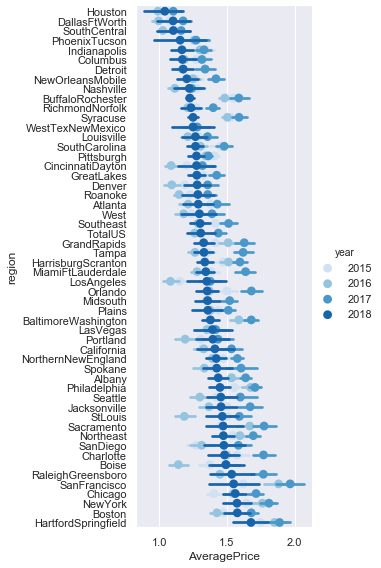

In [9]:
order = (
    palta[(palta['year']==2018)]
    .groupby('region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)


g = sns.factorplot('AveragePrice','region',data=palta,
                   hue='year',
                   size=8,
                   aspect=0.6,
                   palette='Blues',
                   order=order,
                   join=False,
              )

c. Seleccionar solamente las instancias correspondientes a la region "Chicago".

In [10]:
palta_chicago = palta[palta.region == 'Chicago']
palta_chicago.reset_index(inplace = True, drop = True)
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


d. ¿Cómo son los precios de las paltas en función de las distintas variables?

C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


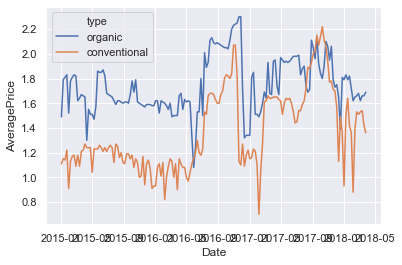

In [11]:
# sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago)
sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago, hue = 'type')

Mejoremos el gráfico

In [12]:
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ValueError: Invalid RGBA argument: masked

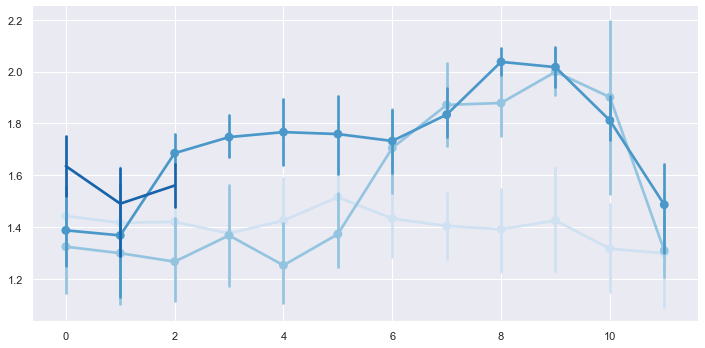

In [13]:
palta_chicago['Month'] = palta_chicago['Date'].dt.month
g = sns.factorplot('Month','AveragePrice',data=palta_chicago,
               hue='year',
               row='region',
               aspect=2,
               palette='Blues',
              );

**Probar con otras variables**

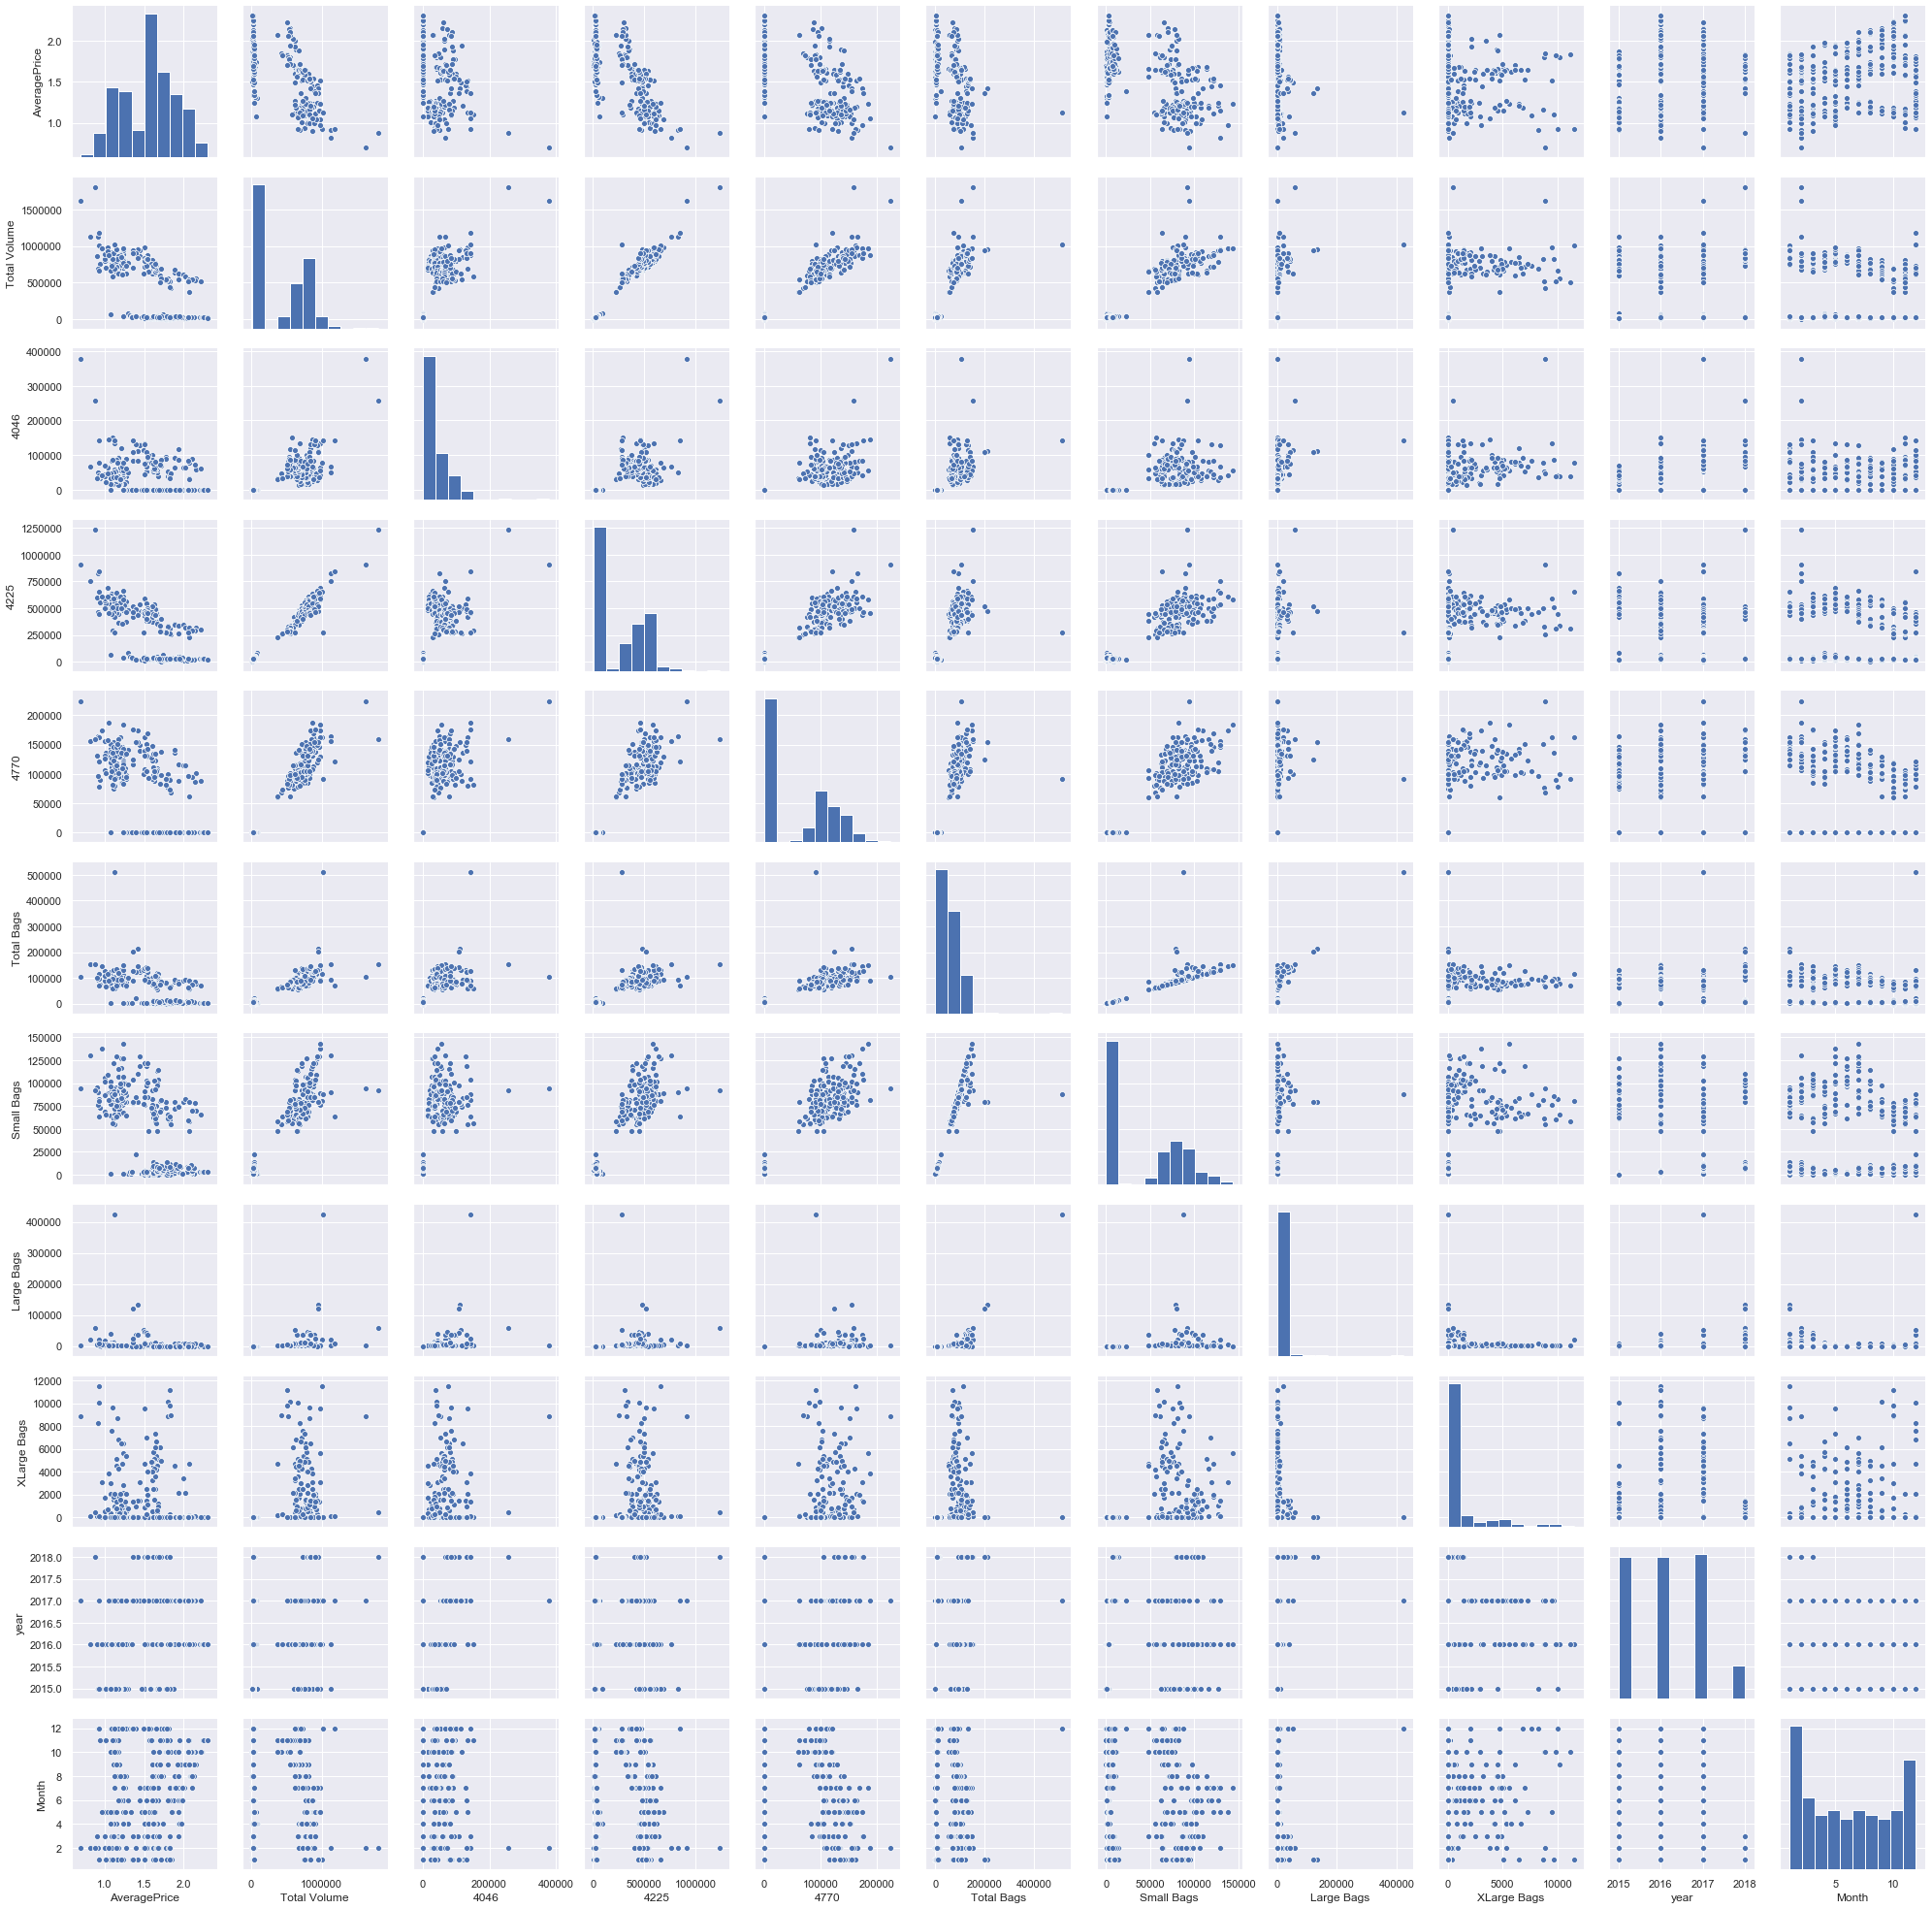

In [15]:
# sns.lineplot(COMPLETAR)
# o usar las funciones que prefieran
sns.pairplot(palta_chicago)

**Cálcular la matriz de correlación**

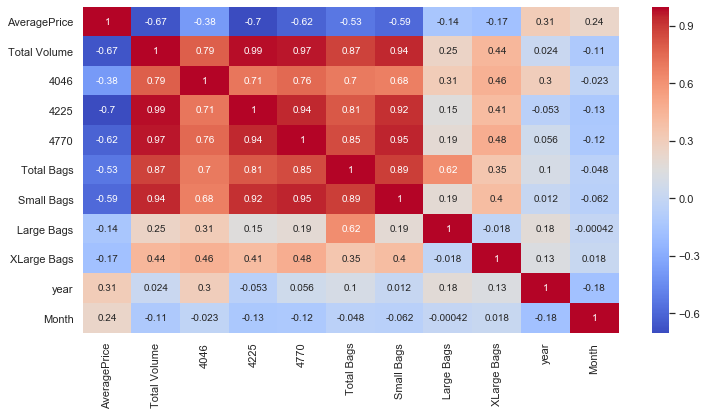

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(palta_chicago.corr(),cmap='coolwarm',annot=True)

#### Pasar fechas a números

A veces, en lugar de trabajar con fechas, es más fácil pasarlas a un número representativo. La siguiente celda se encarga de eso.

In [17]:
import datetime as dt
palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)
palta_chicago.head()

C:\Users\user\Anaconda3\envs\AcamicaDs1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago,1
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago,1
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago,1
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago,1
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago,1


### 3. Modelos de regresión

#### Regresión Lineal 1D

Vamos a entrenar un modelo de regresión lineal entre la fecha y el precio promedio de las paltas convencionales.

In [20]:
palta_chicago_convencional = palta_chicago[palta_chicago.type == 'conventional' ]
palta_chicago_convencional.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago,1
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago,1
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago,1
6,735623,1.22,745439.17,26117.56,488218.44,145882.24,85220.93,75867.61,9265.81,87.51,conventional,2015,Chicago,1
8,735630,0.91,1133491.66,50783.91,824745.44,164884.41,93077.90,89516.93,3448.62,112.35,conventional,2015,Chicago,2


a. Separamos las variables independientes ('Date') y dependientes ('AveragePrice'). Para trabajar con las fechas, la pasamos a números.

In [21]:
X = palta_chicago_convencional.Date.values
y = palta_chicago_convencional.AveragePrice.values
print(X.shape, y.shape)

(169,) (169,)


Hacemos un reshape para X. ¿Por qué?

In [22]:
X = X.reshape(-1,1)
print(X.shape)

(169, 1)


b. Separamos en train/test. EL tamaño del dataset de testeo tiene que ser un 20%

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(126, 1)
(43, 1)
(126,)
(43,)


c. Implementamos y entrenamos el modelo de regresión lineal

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

¿Qué aprendió?

In [28]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[0.00058427]
-428.76320926945476
1


Predecimos sobre los datos de train y de test.

In [34]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Error en datos de train:', mean_squared_error(y_train_pred, X_train))
print('Error en datos de test:', mean_squared_error(y_test_pred, y_test))

NameError: name 'y_train_pred_tree' is not defined

Graficamos

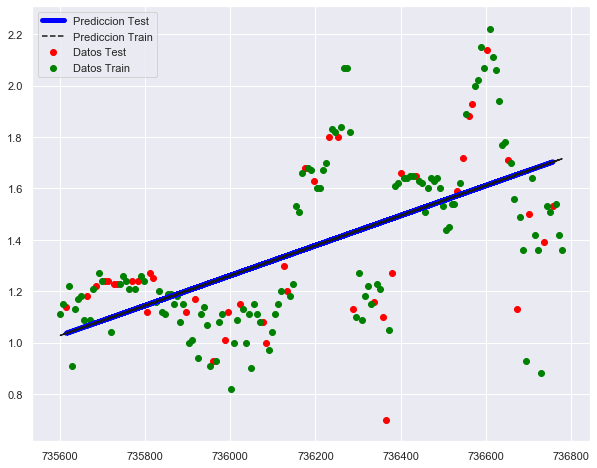

In [32]:
plt.figure(figsize = (10,8))

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.legend()
plt.show()


#### KNN y Árboles

1. Entrenar un modelo de árbol de regresión y un modelo de KNN de regresión, primero usando las mismas variables que para la regresión lineal y después agregando más. Por ejemplo, ¿qué pasa si agregamos la variable "type"?¿Cómo trabajan estos modelos con variables categóricas?
2. Evaluar los desempeños de cada modelo. ¿Qué métricas usarían?¿Hay grandes diferencias?

#### Árboles: Generar un árbol de decisión con el criterio mse y max_depth 5

Calculamos MSE

In [33]:
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_tree))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_tree))

NameError: name 'y_train_pred_tree' is not defined

Y graficamos.

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train, label = 'Datos Train')
plt.scatter(X_train, y_train_pred_tree, label = 'Prediccion Train')

plt.scatter(X_test, y_test, label = 'Datos Test')
plt.scatter(X_test, y_test_pred_tree, label = 'Prediccion Test')

plt.legend()
plt.show()

#### KNN : Generar un módelo de regresión usando KNN con k vecinos igual a 1

¿Por qué no hace falta normalizar en este caso?

Calculamos MSE

In [ ]:
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

Y graficamos.

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train, label = 'Datos Train')
plt.scatter(X_train, y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(X_test, y_test, label = 'Datos Test')
plt.scatter(X_test, y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()

#### Más variables: vamos a hacerlo solo para KNN. Ahora vamos a probar con Date y Type

In [ ]:
palta_chicago.type = palta_chicago.type.map({'conventional': 0, 'organic': 1})
palta_chicago.head()

In [ ]:
X = palta_chicago[['Date','type']].values
y = palta_chicago.AveragePrice.values
print(X.shape, y.shape)

Separar en tran y test

Normalizar las variables

Definamos el modelo nuevamente y entrenemoslo, con n_neigbrons igual a 5 y weights='uniform'

Calculamos MSE

In [ ]:
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

A graficar

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_train[:,0], y_train, label = 'Datos Train')
plt.scatter(X_train[:,0], y_train_pred_knn, label = 'Prediccion Train')

plt.scatter(X_test[:,0], y_test, label = 'Datos Test')
plt.scatter(X_test[:,0], y_test_pred_knn, label = 'Prediccion Test')

plt.legend()
plt.show()